In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib

# 1. Data Preparation and Cleaning


In [2]:
# Read and view sample from the data
df = pd.read_csv('/content/housing_prices.csv')
print(df.shape)
df.head()

(1000, 5)


,Square_Feet,Bedrooms,Age,Location_Rating,Price
0,1360,2,11,7.017154,600672
1,4272,3,31,7.108030,560878
2,3592,1,95,4.257280,676665
3,966,1,91,6.342947,566043
4,4926,2,12,1.091181,593599


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Square_Feet      1000 non-null   int64  
 1   Bedrooms         1000 non-null   int64  
 2   Age              1000 non-null   int64  
 3   Location_Rating  1000 non-null   float64
 4   Price            1000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 39.2 KB


In [4]:
# There are no null values in the dataframe
df.isna().sum()

,0
Square_Feet,0
Bedrooms,0
Age,0
Location_Rating,0
Price,0


In [5]:
df.describe()

,Square_Feet,Bedrooms,Age,Location_Rating,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,48.414000,5.483500,6.044307e+05
std,1255.514921,1.427564,29.183699,2.589672,1.814169e+05
min,503.000000,1.000000,0.000000,1.000105,1.087100e+05
25%,1749.500000,2.000000,22.000000,3.335411,4.775332e+05
50%,2862.500000,3.000000,47.000000,5.502313,6.003425e+05
75%,3849.500000,4.000000,74.000000,7.677870,7.320828e+05
max,4999.000000,5.000000,99.000000,9.980388,1.039240e+06


In [6]:
df['Bedrooms'].nunique()

5

## Data Visulization

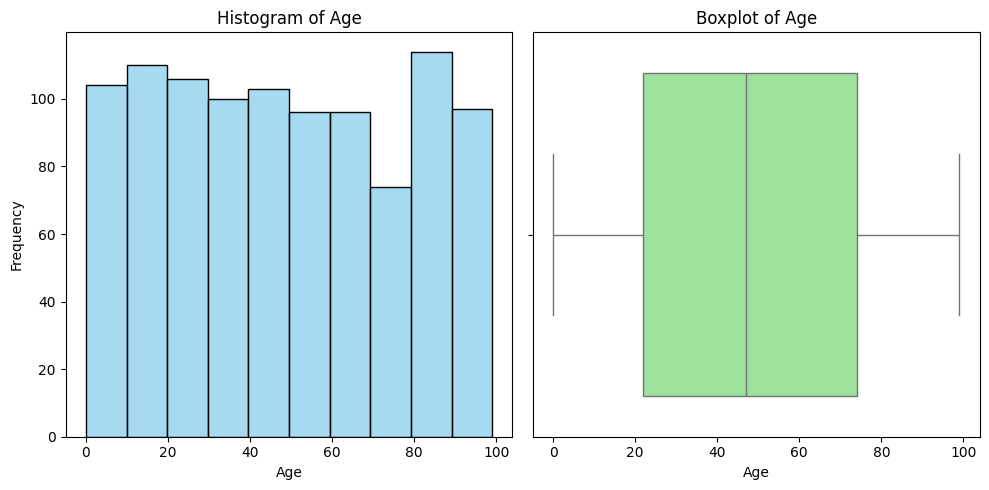

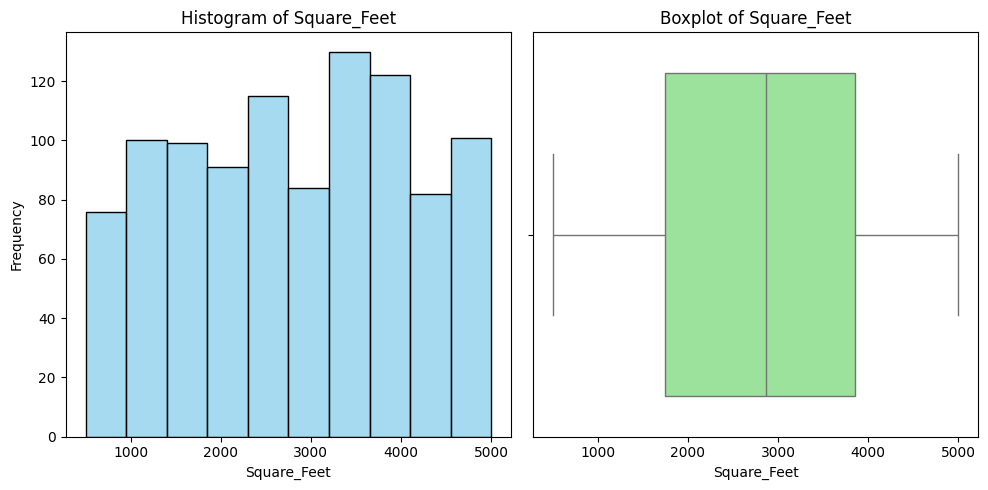

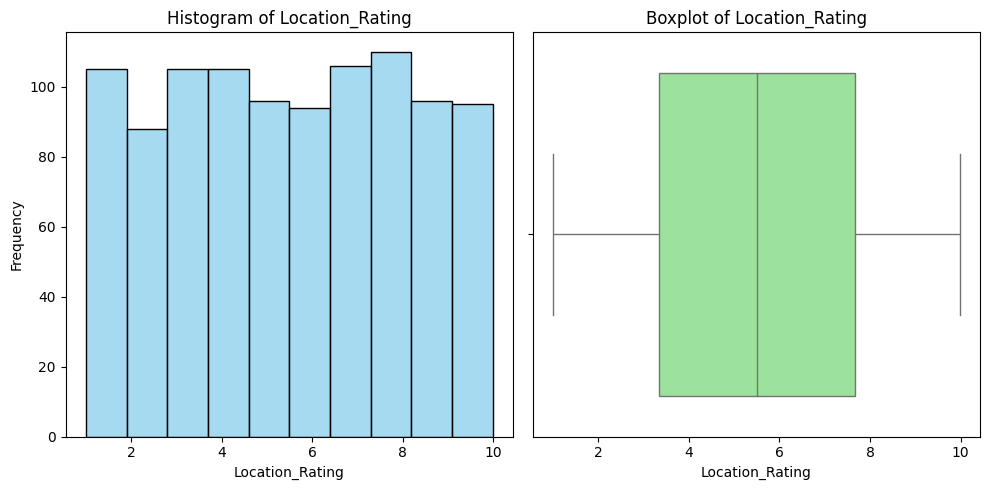

In [22]:
for feature in df[['Age', 'Square_Feet', 'Location_Rating']]:
    # Create a figure for each feature
    plt.figure(figsize=(10, 5))

    # Plot Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], bins=10, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Plot Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature], color='lightgreen')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

    # Display the plots
    plt.tight_layout()
    plt.show()

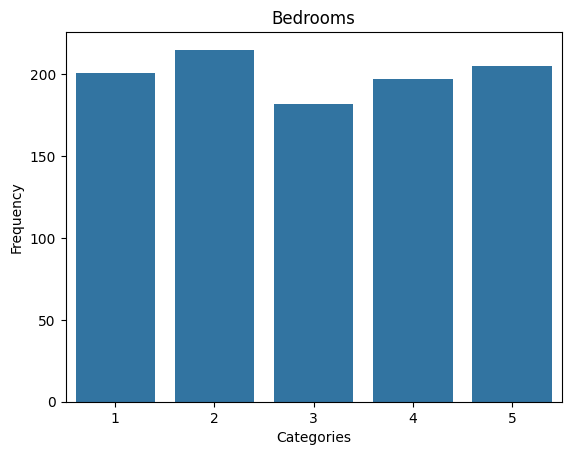

In [8]:
# Get the count plot for the number of Bedrooms
sns.countplot(x='Bedrooms', data=df)
plt.title('Bedrooms')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

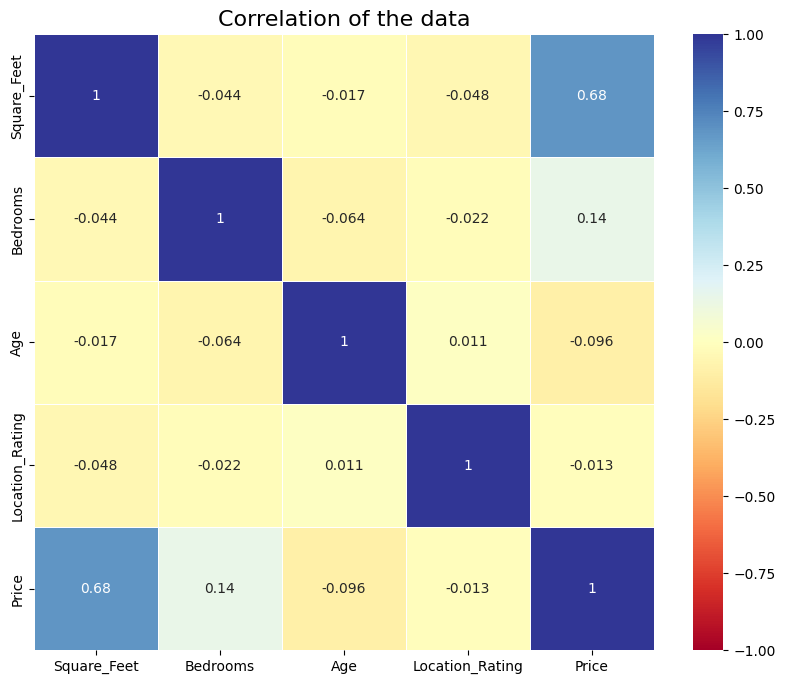

In [9]:
# Compute the correlation for the data
correlation_matrix = df.corr()

# Create Heatmap for the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', linewidths=0.5, vmin=-1, vmax=1, center=0)
plt.title('Correlation of the data', fontsize=16)
plt.show()

## Data Preprocessing

In [10]:
# Separate data
X = df.drop(['Price'], axis=1)
y = df['Price']

In [11]:
X.shape, y.shape

((1000, 4), (1000,))

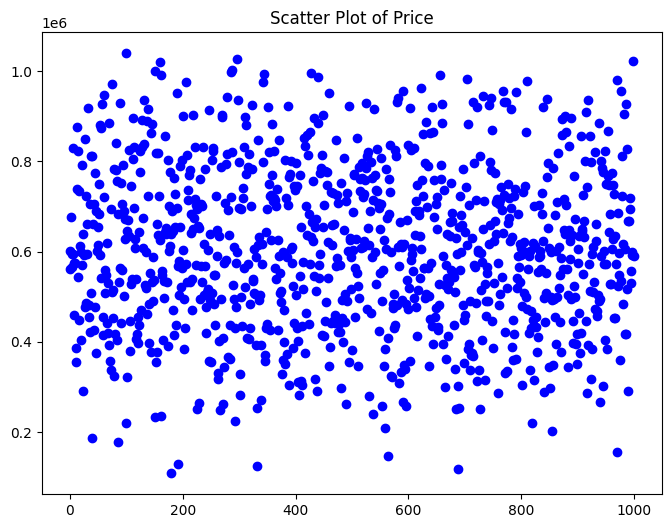

In [12]:
# plot the price to get insight for how the data look like

plt.figure(figsize=(8, 6))
plt.scatter(df.index, y, color='blue', label='Price')
plt.title('Scatter Plot of Price')
plt.show()

# 2. Feature Selection

In [13]:
# I removed the feature with the smallest correlation with the price
X_new = X.drop(['Location_Rating'], axis=1)

# 3. Data Splitting

In [14]:
# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_new, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (700, 3)
y_train shape: (700,)
X_val shape: (150, 3)
y_val shape: (150,)
X_test shape: (150, 3)
y_test shape: (150,)


In [15]:
# Scale some features from the data
scaler = MinMaxScaler(feature_range=(0, 10)) # make the scale from 0 to 10 to be the same scale of the Bedrooms

# Fit the scaler to the training data for 'Square_Feet' and 'Age'
scaler.fit(X_train[['Square_Feet', 'Age']])

# Transform the training, validation, and test data
X_train[['Square_Feet', 'Age']] = scaler.transform(X_train[['Square_Feet', 'Age']])
X_val[['Square_Feet', 'Age']] = scaler.transform(X_val[['Square_Feet', 'Age']])
X_test[['Square_Feet', 'Age']] = scaler.transform(X_test[['Square_Feet', 'Age']])

# Save the scaler for later use
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [16]:
# Display sample of the data after processing
X_train.head()

,Square_Feet,Bedrooms,Age
541,6.098754,5,8.484848
440,9.690836,5,4.040404
482,2.562278,2,9.090909
422,9.065836,2,3.636364
778,3.485320,4,2.525253


# 4. Model Building and Training

In [21]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.2f}")
print(f"Test MAE: {mae:.2f}")

# Save the model to use it in the app
model.save('model.h5')


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 408312315904.0000 - mae: 612712.9375 - val_loss: 369480499200.0000 - val_mae: 583707.8125
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 386831515648.0000 - mae: 596917.3125 - val_loss: 311756881920.0000 - val_mae: 533892.6875
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 307150094336.0000 - mae: 523744.3750 - val_loss: 135958577152.0000 - val_mae: 336121.3438
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 111614296064.0000 - mae: 288306.3125 - val_loss: 34055413760.0000 - val_mae: 153905.7656
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37042589696.0000 - mae: 155953.1406 - val_loss: 31971719168.0000 - val_mae: 149707.0312
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31776829440.0000 - mae: 145270.5469 - val_loss: 28480268288.0000 - val_mae: 143074.7188
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26710245376.0000 - mae: 131619.2500 - val_loss: 275

Test Loss: 16240297984.00
Test MAE: 106391.19


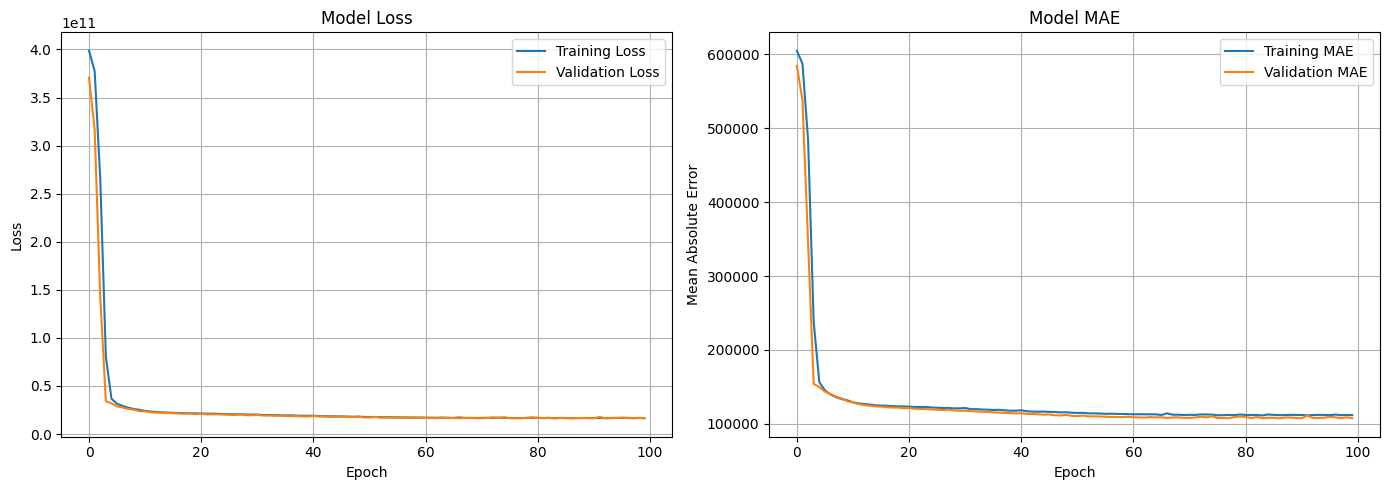

In [20]:
# Plot training & validation loss values
plt.figure(figsize=(14, 5))

# Plotting the loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plotting the metrics
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
